# upgrade the libraries

In [1]:
!pip install --upgrade --user numpy matplotlib scikit-learn tensorflow

  Using cached numpy-1.26.3-cp39-cp39-win_amd64.whl (15.8 MB)
     ---------------------------------------- 10.6/10.6 MB 3.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


# import pandas

In [10]:
import pandas as pd

# import os

In [11]:
import os

print("Current working directory:", os.getcwd())

Current working directory: C:\Users\RADHAPRIYA\Documents\Ju 1\pyziply\titanic


# load dataset from csv file

In [14]:
# Load the Titanic dataset
titanic_data = pd.read_csv('./data2/tested.csv')

# Display the first few rows of the dataset
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


# Missing Values checking

In [15]:
# Check for missing values in each column
missing_values = titanic_data.isnull().sum()
missing_values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data Cleaning

In [16]:
# Load the data from the CSV file
titanic_data = pd.read_csv('./data2/tested.csv')  # Replace with your file path

# Fill missing values for 'Age' and 'Fare' with their respective medians
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

# Drop the 'Cabin' column
titanic_data.drop('Cabin', axis=1, inplace=True)

# Print out a summary of null values across all columns
null_values_summary = titanic_data.isnull().sum()
print(null_values_summary)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Encode Categorical Variables

In [17]:
# One-hot encoding for categorical variables 'Sex' and 'Embarked'
titanic_data_encoded = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'])
titanic_data_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,1,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1,0,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,1,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1,0,0,0,1


# Splitting the Data for Training and Testing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


# Load the data (replace 'path_to_your_file.csv' with the path to your file)
titanic_data = pd.read_csv('./data2/tested.csv')

# Fill missing values for 'Age' and 'Fare' with their respective medians
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

# Drop the 'Cabin' column
titanic_data.drop('Cabin', axis=1, inplace=True)

# One-hot encode categorical variables
encoder = OneHotEncoder()  # Using the default sparse parameter
categorical_columns = ['Sex', 'Embarked']  # Add other categorical columns if needed
encoded_columns = encoder.fit_transform(titanic_data[categorical_columns]).toarray()

# Merge the encoded columns back with the dataset
encoded_column_names = encoder.get_feature_names_out(categorical_columns)
titanic_data_encoded = titanic_data.join(pd.DataFrame(encoded_columns, columns=encoded_column_names))
titanic_data_encoded.drop(categorical_columns, axis=1, inplace=True)

# Split the data into training and testing sets
X = titanic_data_encoded.drop('Survived', axis=1)
y = titanic_data_encoded['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (334, 13)
X_test shape: (84, 13)
y_train shape: (334,)
y_test shape: (84,)


# Train the Logistic Regression Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load and preprocess your data (replace 'path_to_your_file.csv' with your file path)
titanic_data = pd.read_csv('./data2/tested.csv')
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)
titanic_data.drop('Cabin', axis=1, inplace=True)

# Identify and encode categorical variables
encoder = OneHotEncoder()
categorical_columns = ['Sex', 'Embarked']  # Add other categorical columns if needed
encoded_columns = encoder.fit_transform(titanic_data[categorical_columns]).toarray()
encoded_column_names = encoder.get_feature_names_out(categorical_columns)
titanic_data_encoded = titanic_data.join(pd.DataFrame(encoded_columns, columns=encoded_column_names))
titanic_data_encoded.drop(categorical_columns, axis=1, inplace=True)

# Drop other non-numeric columns (e.g., 'Name', 'Ticket')
titanic_data_encoded.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Split the data into training and testing sets
X = titanic_data_encoded.drop('Survived', axis=1)
y = titanic_data_encoded['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Print the model's accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy of the Logistic Regression model:", accuracy)
print("\nClassification Report:\n", report)


Accuracy of the Logistic Regression model: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# Model Evaluation

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess your data (replace 'path_to_your_file.csv' with your file path)
titanic_data = pd.read_csv('./data2/tested.csv')
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)
titanic_data.drop('Cabin', axis=1, inplace=True)

# Identify and encode categorical variables
encoder = OneHotEncoder()
categorical_columns = ['Sex', 'Embarked']
encoded_columns = encoder.fit_transform(titanic_data[categorical_columns]).toarray()
encoded_column_names = encoder.get_feature_names_out(categorical_columns)
titanic_data_encoded = titanic_data.join(pd.DataFrame(encoded_columns, columns=encoded_column_names))
titanic_data_encoded.drop(categorical_columns, axis=1, inplace=True)

# Drop other non-numeric columns (e.g., 'Name', 'Ticket')
titanic_data_encoded.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Split the data into training and testing sets
X = titanic_data_encoded.drop('Survived', axis=1)
y = titanic_data_encoded['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_output)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# Exploration and Visualization

# Age Distribution

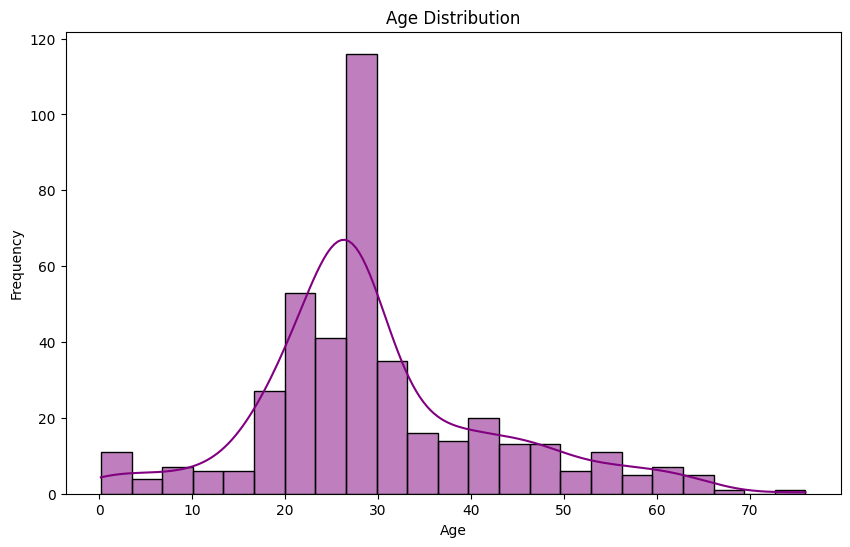

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'], kde=True , color = 'purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Survival by Gender


# Plotting survival rate by gender

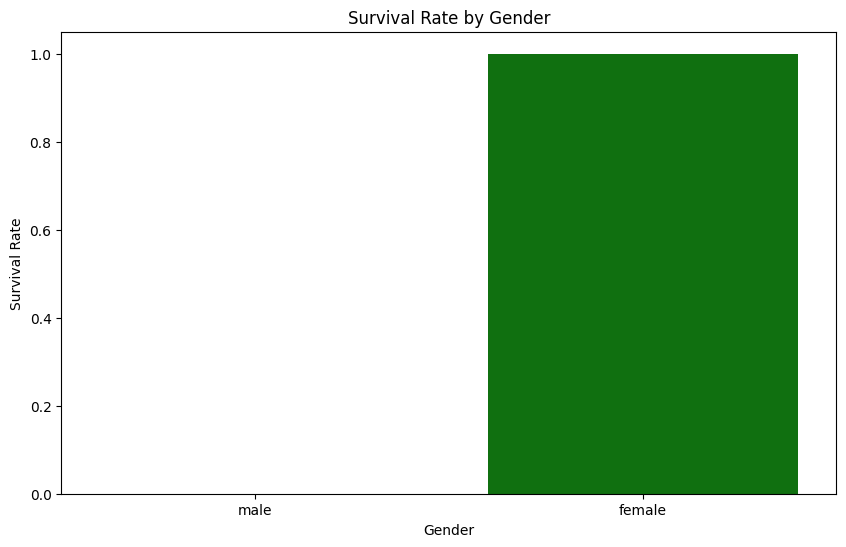

In [24]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_data, color = 'green')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# Feature Engineering

# Creating a Family Size Feature

In [25]:
# Adding a new feature 'FamilySize'
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# Viewing the updated dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3


# Binning Age into Categories

In [26]:
# Binning the age into categories
titanic_data['AgeBin'] = pd.cut(titanic_data['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle Age', 'Senior'])
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,AgeBin
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,Adult
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2,Middle Age
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,Senior
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,Adult
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3,Adult


# Correlation Analysis

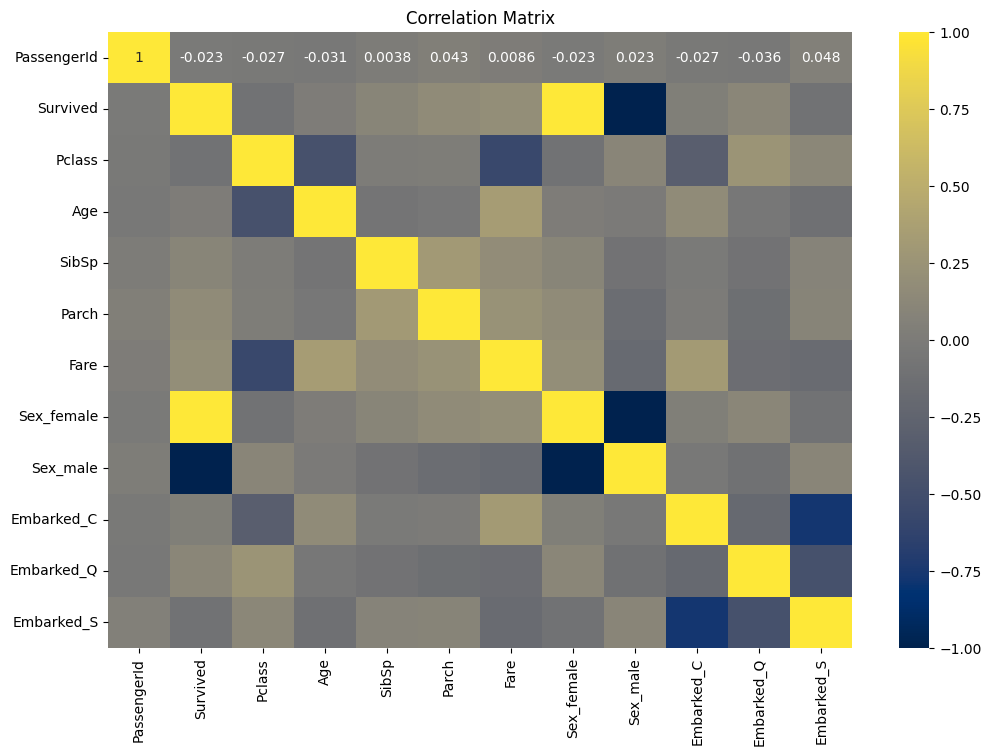

In [28]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(titanic_data_encoded.corr(), annot=True, cmap='cividis')
plt.title('Correlation Matrix')
plt.show()


# Trying Different Models

# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf


1.0

# Model Tuning

 # Grid Search for Hyperparameter Tuning


In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 8, 15, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
grid_search.best_params_

Fitting 5 folds for each of 75 candidates, totalling 375 fits


{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Load and preprocess the updated data (replace 'path_to_your_updated_file.csv' with your file path)
titanic_data_updated = pd.read_csv('./data2/tested.csv')
titanic_data_updated['Age'].fillna(titanic_data_updated['Age'].median(), inplace=True)
titanic_data_updated['Fare'].fillna(titanic_data_updated['Fare'].median(), inplace=True)
titanic_data_updated.drop('Cabin', axis=1, inplace=True)

# One-hot encode categorical variables for the updated dataset
encoder = OneHotEncoder()
categorical_columns_updated = ['Sex', 'Embarked']  # Adjust this list based on your updated dataset
encoded_columns_updated = encoder.fit_transform(titanic_data_updated[categorical_columns_updated]).toarray()
encoded_column_names_updated = encoder.get_feature_names_out(categorical_columns_updated)
titanic_data_encoded_updated = titanic_data_updated.join(pd.DataFrame(encoded_columns_updated, columns=encoded_column_names_updated))
titanic_data_encoded_updated.drop(categorical_columns_updated, axis=1, inplace=True)

# Drop other non-numeric columns if present in the updated dataset
titanic_data_encoded_updated.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Define the features (X) and target (y) for the updated dataset
X_updated = titanic_data_encoded_updated.drop('Survived', axis=1)
y_updated = titanic_data_encoded_updated['Survived']

# Create a Random Forest model
random_forest_model = RandomForestClassifier()

# Perform cross-validation on the updated dataset
cv_scores_updated = cross_val_score(random_forest_model, X_updated, y_updated, cv=10)

# Calculate and print the mean cross-validation score
mean_cv_score_updated = cv_scores_updated.mean()
print("Mean Cross-Validation Score:", mean_cv_score_updated)


Mean Cross-Validation Score: 1.0


In [32]:
# Assuming the dataset and train-test split are already prepared as X_train, y_train
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Getting feature importances
feature_importances = random_forest_model.feature_importances_

# Creating a DataFrame for visualization
features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sorting the features based on importance
features = features.sort_values(by='Importance', ascending=False)

# Displaying the feature importances
print(features)

        Feature  Importance
7      Sex_male    0.518927
6    Sex_female    0.437543
5          Fare    0.014342
2           Age    0.006542
4         Parch    0.005618
0   PassengerId    0.004692
3         SibSp    0.003912
9    Embarked_Q    0.003889
1        Pclass    0.003199
10   Embarked_S    0.000764
8    Embarked_C    0.000572
